# Trabajo Final - Análisis de datos cualitativos

La resolución de los ejercicios debe entregarse en un documento junto con el
código fuente en python para resolverlo. La fecha límite de entrega es el lunes
22 de mayo de 2023 (cuatro semanas desde la entrega del enunciado).

## Ejercicio 1

El archivo "exercise_one_data.csv" contiene un dataset de datos cualitativos
sobre pacientes diagnosticados con cancer de mama. El objetivo es crear
predictor que pueda estimar la sobrevida de un paciente luego de cinco años del
momento del diagnóstico positivo.

Las variables utilizadas para describir los datos son:

- provincia: Provincia de origen del paciente.
- centro_de_salud_cercano: Es "True" si el paciente tiene un centro médico de
  de atención disponible a 10 km o menos, "False" en caso contrario.
- estadio_al_momento_de_diagnostico: El estadio de tumor, desde "I" hasta "IV".
- consulta_en_el_ano_previo_al_diagnostico: "True" si el paciente realizó una
  consulta oncológica en el año previo al diagnóstico.
- cobertura_de_salud: Tipo de cobertura de salud: "Publico" si el paciente se
  fue diagnosticado en un centro de salud público. "Proveedor A" si el paciente
  fue diagnosticado en en centro de salud privado del tercio superior en precio
  promedio. "Proveedor B", si el paciente fue diagnosticado en un centro de
  salud del segundo de tercio en precio promedio y "Proveedor C" si el paciente
  fue diagnosticado en un centro de salud privado del tercer tercio en precio
  promedio.
- edad: rango de edad del paciente.
- comorbilidad_cardiaca: "True" si el paciente tiene un diagnóstico positivo
  para una afección cardíaca al momento de diagnóstico.
- comorbilidad_sistema_digestivo: "True" si el paciente tiene un diagnóstico
  positivo para una afección del sistema digestivo al momento del diagnóstico.
- comorbilidad_sistema_endocrino: "True" si el paciente tiene un diagnóstico
  positivo para una afección del sistema endócrino al momento de diagnóstico.
- tamano_tumor: Tamaño del tumor, "pequeno" si el es de 2cm o menos, "mediano"
  si es de 2 a 5 cm, y "grande" si es de más de 5cm.
- estado_nodos_linfatico: "positivo" si se encontraron células tumorales en los
  nodos linfáticos. "negativo" de lo contrario.
- estado_receptor_hormonas: "ER" si el tumor expresa el receptor de estrógeno,
  "PR" si expresa el receptor de progesterona, "ER/PR" si expresa ambos,
  "Ninguno" si no expresa ninguno de los dos.
- grado_diferenciacion_tumor: Grado de diferenciación de las células del tumor:
  "bajo", "medio", "alto".
- sobrevida_a_cinco_anos: "True" si el paciente tuvo una sobrevida mayor a 5
  años del momento del diagnóstico, "False" de lo contrario.

Nota: Los datos de este ejercicio son simulados y no guardan ninguna relación
con pacientes reales, ni tienen valor diagnótico.


### 1.A - Descripción inicial del data set

- Realizar un análisis de correspondencia múltiple de los datos.
  - Mostrar gráficos (uno por variable aleatoria) donde se puedan observar el
    agrupamiento de los datos distinguiendo los valores de la variable con
    diferentes colores o marcadores.


En esta primer parte hay que hacer un MCA (Análisis Múltiple de Correspondencias).
Vimos esta técnica en la clase de reducción de dimensiones, después del ejemplo
de PCA.

Vamos a hacer una revisión de como se hace un MCA en python con un dataset de
prueba, ustedes tienen que hacer lo mismo con el dataset del examen.

Cargamos el dataset de prueba.
Tiene 20 elementos y tres variables categoricas, cada una de ellos con tres valores.

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
example_data = pd.DataFrame(
  {
    "color":{
      "0":"naraja","1":"naraja","2":"violeta","3":"violeta",
      "4":"naraja","5":"naraja","6":"naraja","7":"naraja",
      "8":"marron","9":"naraja","10":"naraja","11":"naraja",
      "12":"violeta","13":"naraja","14":"naraja","15":"naraja",
      "16":"naraja","17":"naraja","18":"violeta","19":"violeta"
    },
    "direccion":{
      "0":"derecha","1":"derecha","2":"izquierda","3":"derecha",
      "4":"derecha","5":"izquierda","6":"centro","7":"derecha",
      "8":"izquierda","9":"centro","10":"derecha","11":"izquierda",
      "12":"centro","13":"derecha","14":"centro","15":"izquierda",
      "16":"centro","17":"izquierda","18":"izquierda","19":"centro"
    },
    "altura":{
      "0":"bajo","1":"bajo","2":"alto","3":"bajo",
      "4":"alto","5":"medio","6":"alto","7":"medio",
      "8":"alto","9":"bajo","10":"medio","11":"bajo",
      "12":"bajo","13":"alto","14":"medio","15":"alto",
      "16":"alto","17":"medio","18":"medio","19":"alto"
    }
  }
)
example_data


,color,direccion,altura
0,naraja,derecha,bajo
1,naraja,derecha,bajo
2,violeta,izquierda,alto
3,violeta,derecha,bajo
4,naraja,derecha,alto
5,naraja,izquierda,medio
6,naraja,centro,alto
7,naraja,derecha,medio
8,marron,izquierda,alto
9,naraja,centro,bajo


Ahora hacemos el MCA.

In [ ]:
import prince

mca = prince.MCA(n_components = 2)
transformed = mca.fit_transform(example_data).to_numpy()

Ahora generamos el grafico.

El ejercicio pide generar una grafico para cada
variable y colorear de acuerdo a los valores de esa variable. En esta guia
solo muestro un grafico coloreado para la variable "color", las demas se
resuelven igual, pero cambiando el nombre de la variable.

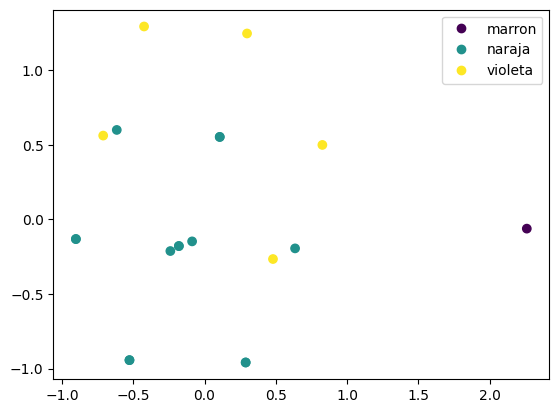

In [126]:
import matplotlib.pyplot as plt

scatter = plt.scatter(
  x = transformed[:, 0],
  y = transformed[:, 1],
  c = example_data["color"].astype("category").cat.codes,
)
handles, _ = scatter.legend_elements(prop="colors")
labels = example_data["color"].astype("category").cat.categories.values
_ = plt.legend(handles, labels)

- Estime las frecuencias de aparición de cada valor para cada variable
  aleatoria

Calcular las frecuencias de aparación de cada valor para cada variable es muy
sencillo, se puede hacer usando el método "value_counts" de los DataFrame.

In [134]:
example_data["color"].value_counts() / len(example_data)

naraja     0.70
violeta    0.25
marron     0.05
Name: color, dtype: float64

.
- Busque posibles asociaciones entre pares de variables aleatorias.


Este es el punto más complidado de este ejercicio, requiere buscar un poco en
la literatura. En la documentación del paquete "scipy" que usamos en el curso
se muestran varios métodos para estimar asociación de variables categóricas.

Uno de los más usados es el método de Cramer.
Veamos un ejemplo con dos variables muy asociadas y luego otro con variables no
asociadas.

In [140]:
import numpy as np

var1 = np.array(
  [
    "BAJO", "ALTO", "MEDIO", "BAJO", "ALTO",
    "ALTO", "BAJO", "MEDIO", "ALTO", "ALTO"
  ]
)

var2 = np.array(
  [
    "AZUL", "ROJO", "BLANCO", "AZUL", "ROJO",
    "BLANCO", "AZUL", "BLANCO", "BLANCO", "ROJO"
  ]
)

Podemos ver que las dos variables estan asociadas, porque en las posiciones en
las que var1 es "BAJO", var2 es usualmente "AZUL", cuando var1 es "MEDIO", var2
es usualmente "BLANCO" y cuando var1 es "ALTO", var2 es usualmente "ROJO".

Primero necesitamos construir una tabla de contingencia para estas dos variables.

In [141]:
from scipy import stats

vars, tabla_var1_var2 = stats.contingency.crosstab(var1, var2)
print(vars)
print(tabla_var1_var2)

(array(['ALTO', 'BAJO', 'MEDIO'], dtype='<U5'), array(['AZUL', 'BLANCO', 'ROJO'], dtype='<U6'))
[[0 2 3]
 [3 0 0]
 [0 2 0]]


Ahora puedo calcular la asociacion. El valor de asociacion esta en el rango [0, 1].
Cero implica que no hay asociacion y Uno es asociacion perfecta.

In [142]:
stats.contingency.association(tabla_var1_var2, method="cramer")

0.806225774829855

Veamos ahora el caso en el que no hay asociacion.

In [166]:
import numpy as np
from scipy import stats

# Shuffle ordena los valores al azar,
# De esta forma se pierde la asociacion
# entre var1 y var2
np.random.shuffle(var1)
np.random.shuffle(var2)

vars, tabla_var1_var2 = stats.contingency.crosstab(var1, var2)
stats.contingency.association(tabla_var1_var2, method="cramer")

0.2554951619459315


### 1.B - Métodos de predición

Genere tres métodos de predición:

- Uno basado en un modelo lineal logístico.
- Otro basado en Random Forest.
- El último basado en el análisis de discriminantes lineales.

Para los tres casos, muestre la forma de evaluación y el resultado con curvas
ROC y el área bajo la curva ROC.

Trabajamos en la clase con la regresion logistica, aca les recuerdo el ejemplo
que vimos.

Primero cargamos un dataset de prueba:



In [168]:
from rdatasets import data

survey = data("MASS", "survey")
survey.dropna(inplace=True)
survey

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.00,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.80,Imperial,17.583
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.00,Metric,23.667
5,Female,18.0,17.7,Right,L on R,64.0,Right,Some,Never,172.72,Imperial,21.000
6,Male,17.7,17.7,Right,L on R,83.0,Right,Freq,Never,182.88,Imperial,18.833
...,...,...,...,...,...,...,...,...,...,...,...,...
230,Female,18.8,18.5,Right,R on L,80.0,Right,Some,Never,169.00,Metric,18.167
232,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.10,Imperial,17.667
233,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.00,Metric,16.917
235,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.00,Metric,17.167


Queremos predecir el valor de la variable "Sex", para ello necesitamos
convertirla en una variable numerico con valores 0, y 1.

Queremos usar como predictores los valores de las variables "Height" y "Pulse".

In [177]:
survey["Sex"] = survey["Sex"].astype("category").cat.codes
survey

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,0,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.00,Metric,18.250
1,1,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.80,Imperial,17.583
4,1,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.00,Metric,23.667
5,0,18.0,17.7,Right,L on R,64.0,Right,Some,Never,172.72,Imperial,21.000
6,1,17.7,17.7,Right,L on R,83.0,Right,Freq,Never,182.88,Imperial,18.833
...,...,...,...,...,...,...,...,...,...,...,...,...
230,0,18.8,18.5,Right,R on L,80.0,Right,Some,Never,169.00,Metric,18.167
232,0,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.10,Imperial,17.667
233,0,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.00,Metric,16.917
235,1,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.00,Metric,17.167


Hacemos el ajuste del modelo a los datos.

In [180]:
import statsmodels.api as sm

exog = sm.add_constant(survey[["Height", "Pulse"]])

regmod = sm.OLS(endog=survey["Sex"], exog=exog)
fitted = regmod.fit()

Hacemos la prediccion de los valores.

En este ejemplo, estoy haciendo la prediccion sobre los datos de entrenamiento,
esto no es lo tipicamente se quiere hacer.

In [184]:
predicted_prob = (fitted.predict(exog) > 0.5).astype(int)
print(predicted_prob)

0      1
1      1
4      0
5      1
6      1
      ..
230    0
232    0
233    0
235    1
236    0
Length: 168, dtype: int64


Para el caso del RandomForest, tambien habia que profundizar un poco en la
literatura. En la ultima clase vimos arboles de decision como metodo de
prediccion. Un RandomForest es una coleccion de arboles de decision. El mismo
paquete de python que usamos en los ejemplos de arbol de decision en la clase
("sklearn" ), nos permite usar RandomForest.

In [194]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

fitted = rf.fit(survey[["Height", "Pulse"]], survey["Sex"])

predicted = fitted.predict(survey[["Height", "Pulse"]])
print(predicted)

[[0.74       0.26      ]
 [0.07       0.93      ]
 [0.29       0.71      ]
 [0.86       0.14      ]
 [0.         1.        ]
 [1.         0.        ]
 [0.48783333 0.51216667]
 [0.13       0.87      ]
 [0.96       0.04      ]
 [0.84       0.16      ]
 [1.         0.        ]
 [0.         1.        ]
 [0.04       0.96      ]
 [0.         1.        ]
 [0.         1.        ]
 [0.01       0.99      ]
 [0.         1.        ]
 [0.11       0.89      ]
 [0.03166667 0.96833333]
 [0.31       0.69      ]
 [0.         1.        ]
 [0.96       0.04      ]
 [0.09       0.91      ]
 [0.         1.        ]
 [0.         1.        ]
 [0.02       0.98      ]
 [0.79       0.21      ]
 [0.62       0.38      ]
 [0.         1.        ]
 [0.22       0.78      ]
 [0.94       0.06      ]
 [0.9        0.1       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.19333333 0.80666667]
 [0.         1.        ]
 [0.01       0.99      ]
 [1.         0.        ]
 [0.01       0.99      ]
 [0.         1.        ]


Con el metodo "predict_proba" podemos calular las probabilidades de cada
prediccion. Esto lo vamos a necesitar para hacer el AUC y la curva ROC.

In [ ]:
predicted_prob = fitted.predict_proba(survey[["Height", "Pulse"]])

print(predicted_prob)

Por ultimo vamos a hacer un predictor usando un discriminante lineal (LDA).

Vimos LDA en las clases, igualmente dejo un ejemplo.

In [199]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

fitted = lda.fit(survey[["Height", "Pulse"]], survey["Sex"])

predicted = fitted.predict(survey[["Height", "Pulse"]])
print(predicted)


[1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0]


array([[4.75161663e-01, 5.24838337e-01],
       [2.07156069e-01, 7.92843931e-01],
       [8.68928204e-01, 1.31071796e-01],
       [4.78475100e-01, 5.21524900e-01],
       [6.12000276e-02, 9.38799972e-01],
       [9.83547286e-01, 1.64527143e-02],
       [3.38170919e-01, 6.61829081e-01],
       [8.14898351e-01, 1.85101649e-01],
       [9.86811657e-01, 1.31883435e-02],
       [9.90067571e-01, 9.93242864e-03],
       [9.84065533e-01, 1.59344672e-02],
       [6.00880940e-02, 9.39911906e-01],
       [2.33780415e-01, 7.66219585e-01],
       [8.42204672e-03, 9.91577953e-01],
       [1.10766585e-01, 8.89233415e-01],
       [1.09069084e-01, 8.90930916e-01],
       [4.42753778e-02, 9.55724622e-01],
       [4.92559856e-01, 5.07440144e-01],
       [3.18240826e-01, 6.81759174e-01],
       [8.11272666e-01, 1.88727334e-01],
       [1.21313285e-01, 8.78686715e-01],
       [8.32257537e-01, 1.67742463e-01],
       [1.19475873e-01, 8.80524127e-01],
       [9.47764230e-03, 9.90522358e-01],
       [6.575089

In [305]:
predicted_prob = fitted.predict_proba(survey[["Height", "Pulse"]])
print(predicted_prob)

[[4.75161663e-01 5.24838337e-01]
 [2.07156069e-01 7.92843931e-01]
 [8.68928204e-01 1.31071796e-01]
 [4.78475100e-01 5.21524900e-01]
 [6.12000276e-02 9.38799972e-01]
 [9.83547286e-01 1.64527143e-02]
 [3.38170919e-01 6.61829081e-01]
 [8.14898351e-01 1.85101649e-01]
 [9.86811657e-01 1.31883435e-02]
 [9.90067571e-01 9.93242864e-03]
 [9.84065533e-01 1.59344672e-02]
 [6.00880940e-02 9.39911906e-01]
 [2.33780415e-01 7.66219585e-01]
 [8.42204672e-03 9.91577953e-01]
 [1.10766585e-01 8.89233415e-01]
 [1.09069084e-01 8.90930916e-01]
 [4.42753778e-02 9.55724622e-01]
 [4.92559856e-01 5.07440144e-01]
 [3.18240826e-01 6.81759174e-01]
 [8.11272666e-01 1.88727334e-01]
 [1.21313285e-01 8.78686715e-01]
 [8.32257537e-01 1.67742463e-01]
 [1.19475873e-01 8.80524127e-01]
 [9.47764230e-03 9.90522358e-01]
 [6.57508950e-02 9.34249105e-01]
 [3.56631170e-02 9.64336883e-01]
 [9.90347516e-01 9.65248438e-03]
 [2.59112226e-01 7.40887774e-01]
 [1.22707284e-01 8.77292716e-01]
 [6.68676639e-01 3.31323361e-01]
 [7.600166

0.8511904761904762

Por ultimo queda hacer las curvas ROC de cada predictor.

Veamos un ejemplo con el resultado del LDA anterior.

In [209]:
data_roc = pd.DataFrame(
  {
    "observed" : survey["Sex"],
    "predicted" : predicted,
    "probability" : np.max(predicted_prob, axis=1)
  }
)
data_roc = data_roc.sort_values("probability", ascending=False)
data_roc = data_roc.assign(
  hit = (data_roc["observed"] == data_roc["predicted"]).astype(int)
)
data_roc

,observed,predicted,probability,hit
50,1,1,0.999336,1
189,1,1,0.998057,1
150,1,1,0.997399,1
129,0,0,0.995709,1
117,1,1,0.995575,1
...,...,...,...,...
142,0,1,0.520984,0
126,0,1,0.519360,0
153,1,1,0.518818,1
176,1,1,0.515027,1


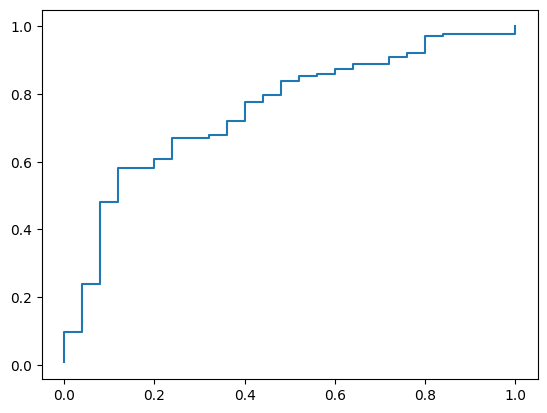

In [214]:
import matplotlib.pyplot as plt
tpr = data_roc["hit"].cumsum() / data_roc["hit"].sum()
fpr = (1-data_roc["hit"]).cumsum() / (len(data_roc["hit"]) - data_roc["hit"].sum())
plt.plot(fpr, tpr)

In [215]:
from sklearn import metrics

auc = metrics.auc(fpr, tpr)
print(auc)

0.7530069930069931



## Ejercicio 2

En su lugar de trabajo están desarrollando un método de predicción tal que
permita estimar el tamaño de la planta modelo *A. thaliana* en función del
nivel de expresión de cinco genes medidos a nivel cualitativo. Debido a que
hasta el momento tienen pocos datos disponibles, le piden a usted que genere un
conjunto de datos aleatorio para avanzar con el desarrollo del métodos hasta que
nuevos datos experimental estén disponibles.

La expresión de los genes está medida en cinco niveles: "No_expresado",
"Poco_expresado", "Medianamente_expresado", "Bastante_expreado",
"Muy_Expresado". Los genes medidos son: "AT1G01239", "AT2G01130", "AT1G01060",
"AT3G02860" y "AT5G12041". Los datos generados deben respetar ciertas
frecuencias y asociaciones entre variables observadas consitentemente en datos
previos. La tabla resumen las frecuencias.


| Expr/Gene              |AT1G01239|AT2G01130|AT1G01060|AT3G02860|AT5G12041|
| ----                   | ----    | ----    | ----    | ----    | ----    |
| No_expresado           | 13.2%   |  9.2%   | 15.8%   | 11.2%   | 30.9%   |
| Poco_expresado         | 30.4%   | 60.7%   | 15.9%   | 20.3%   | 25.2%   |
| Medianamente_expresado | 25.3%   | 15.1%   | 17.4%   | 30.4%   | 24.0%   |
| Bastante_expreado      | 20.9%   | 12.4    | 22.5%   | 19.0%   | 19.3%   |
| Muy_Expresado          | 10.2%   |  2.6%   | 28.4%   | 19.1%   |  0.6%   |


La expresión de los genes AT1G01239 y AT1G01060 está asociada, de forma tal que
la alta de expresión de uno de ellos suele estar acompañada con la alta
expresión del otro. Del forma parecida, la expresión de AT3G02860 está asociada
de forma inversa con respecto a AT5G12041, es decir que la expresión alta de uno
de ellos suele estar acompañada con la expresión baja o nula del otro.


En este ejercicio hay que saber hacer dos cosas:

- Generar datos aleatorios que respeten las frecuencias pedidas.
- Generar datos asociados.


Para generar datos aleatorios categoricos que respeten ciertas frecuencias
se puede utilizar la funcion "multinomial" de scipy.

In [241]:
from scipy import stats

# queremos generar datos que pueden ser A, B o C, donde el 70% approx son A,
# 20% B y 10% C
values = np.array(["A", "B", "C"])
indexes = stats.multinomial.rvs(1, p = [0.7, 0.2, 0.1], size=10)
indexes = np.max(indexes * np.arange(len(values)), axis=1)
data = values[indexes]
data

array(['A', 'A', 'C', 'B', 'A', 'A', 'B', 'B', 'A', 'B'], dtype='<U1')

Para generar datos asociados se puede usar un modelo lineal Y = a * X + E,
donde X e Y son las variables continuas aleatorias que se quiere tener asociadas
y E es un termino de error que le va a dar un cierta aleatoriedad al modelo.



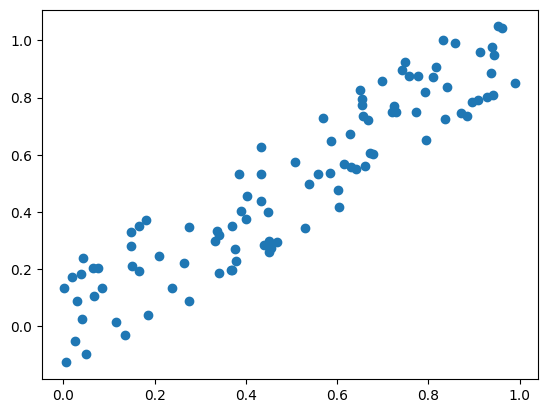

In [296]:
x = np.random.random(100)
error = (0.5 - np.random.random(100)) * 0.4
y = x + error

plt.scatter(x, y)

Luego discretizamos los valores continuos de X e Y, en las categorias que
necesitamos. La idea es ordenar los valores de menos a mayor y asignar las
etiquetas de las categorias de acuerdo a ese orden. A los valores mas bajos, le
asignaremos la categorias "BAJO", a los siguientes "MEDIO" y a los mayores
"ALTO". La cantidad de cada una de estas etiquetas estan dadas por las
frecuencias asignadas a cada una.

In [297]:
data = pd.DataFrame(
  {
    "x": x,
    "y": y
  }
)
data

,x,y
0,0.340297,0.184871
1,0.952647,1.048617
2,0.602550,0.478346
3,0.451028,0.259439
4,0.836677,0.726436
...,...,...
95,0.614302,0.568258
96,0.728817,0.749219
97,0.884788,0.737046
98,0.667906,0.721552


In [298]:
# Genero datos de X al azar segun las frecuencias dadas
x_vals = np.array(["BAJO", "MEDIO", "ALTO"])
x_freqs = np.array([0.6, 0.2, 0.2])
x_random = np.max(stats.multinomial.rvs(1, x_freqs, 100) * np.arange(3), axis=1)
x_random.sort()
x_random


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [299]:
# Genero datos de Y al azar segun las frecuencias dadas
y_vals = np.array(["BAJO", "MEDIO", "ALTO"])
y_freqs = np.array([0.5, 0.25, 0.25])
y_random = np.max(stats.multinomial.rvs(1, y_freqs, 100) * np.arange(3), axis=1)
y_random.sort()
y_random

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Agrego los valores de x_random e y_random a los datos

In [300]:
data = data.sort_values("x")
data = data.assign(x_random = x_random)
data = data.sort_values("y")
data = data.assign(y_random = y_random)
shuffled_index = data.index.to_numpy()
np.random.shuffle(shuffled_index)
data = data.iloc[shuffled_index, :]
data

,x,y,x_random,y_random
89,0.085381,0.133210,0,0
21,0.377181,0.271445,0,0
76,0.432656,0.533440,0,0
7,0.939599,0.976716,2,2
81,0.378457,0.229463,0,0
...,...,...,...,...
38,0.030382,0.087224,0,0
40,0.831526,1.002793,2,2
17,0.165550,0.350964,0,0
13,0.337873,0.333311,0,0


Reemplazo los valores de x_random e y_random por los nombres de las categorias
que le corresponden.

In [301]:
new_x_random = x_vals[data.x_random]
new_y_random = y_vals[data.y_random]
print(new_x_random)
print(new_y_random)

['BAJO' 'BAJO' 'BAJO' 'ALTO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'ALTO'
 'BAJO' 'ALTO' 'MEDIO' 'MEDIO' 'BAJO' 'ALTO' 'ALTO' 'BAJO' 'MEDIO' 'BAJO'
 'ALTO' 'BAJO' 'BAJO' 'MEDIO' 'MEDIO' 'BAJO' 'ALTO' 'BAJO' 'ALTO' 'BAJO'
 'BAJO' 'BAJO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'MEDIO'
 'BAJO' 'ALTO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'MEDIO' 'MEDIO'
 'BAJO' 'ALTO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'BAJO'
 'BAJO' 'MEDIO' 'MEDIO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'BAJO'
 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'MEDIO' 'BAJO' 'MEDIO' 'BAJO' 'BAJO' 'MEDIO'
 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'BAJO'
 'ALTO' 'BAJO' 'ALTO' 'MEDIO' 'BAJO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO']
['BAJO' 'BAJO' 'BAJO' 'ALTO' 'BAJO' 'MEDIO' 'BAJO' 'BAJO' 'BAJO' 'ALTO'
 'BAJO' 'ALTO' 'MEDIO' 'MEDIO' 'BAJO' 'ALTO' 'MEDIO' 'BAJO' 'ALTO' 'BAJO'
 'ALTO' 'BAJO' 'BAJO' 'ALTO' 'MEDIO' 'BAJO' 'ALTO' 'BAJO' 'MEDIO' 'MEDIO'
 'MEDIO' 'BAJO' 'BAJO' 'ALTO' 'BAJO' 'BAJO' 'BAJO' 'MED

In [302]:
vars, cont_table = stats.contingency.crosstab(new_x_random, new_y_random)

cont_table

stats.contingency.association(cont_table)

0.5964004373699375